In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from dataclasses import dataclass, field, asdict
import argparse

from AOUP import Parameter, AOUP

In [2]:
slope, Lambda, velocity = 0.2, 0.5, 0.0

parameter = Parameter(
    N_particle = 300,
    N_ensemble = 100,
    velocity = velocity,
    slope = slope,
    Lambda = Lambda,
    boundary = 3.0,
    N_bins = 60,
    gamma = 1.0,
    temperature = 0.001,
    tau = 1.0,
    Da = 1.0,
    delta_t = 0.001,
    initial = 10000,
    sampling = 100,
    interval = 1000,
    potential = 4
)

print(parameter)

Parameter(N_particle=300, N_ensemble=100, velocity=0.0, Lambda=0.5, boundary=3.0, N_bins=60, gamma=1.0, slope=0.2, temperature=0.001, tau=1.0, Da=1.0, delta_t=0.001, initial=10000, sampling=100, interval=1000, potential=4)


In [3]:
aoup = AOUP(parameter)

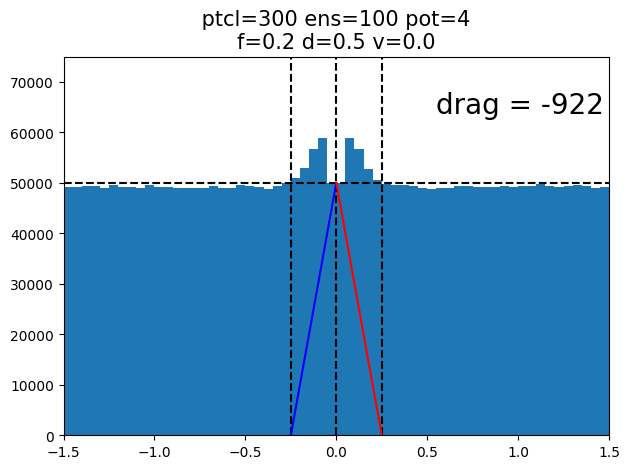

In [4]:
aoup.average_distribution(frames=100)

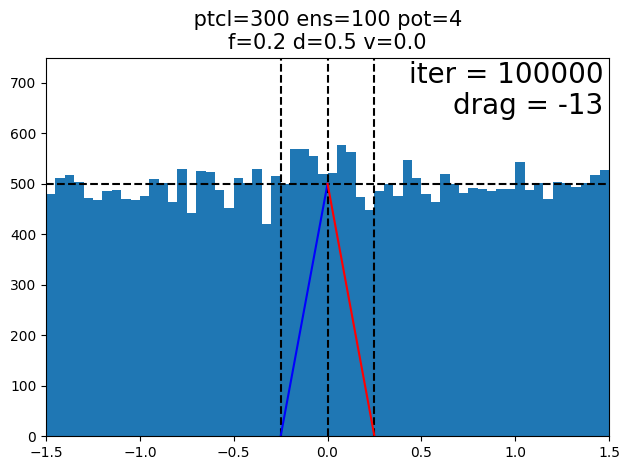

In [5]:
aoup.histogram_animation(frames=100, fps=30)

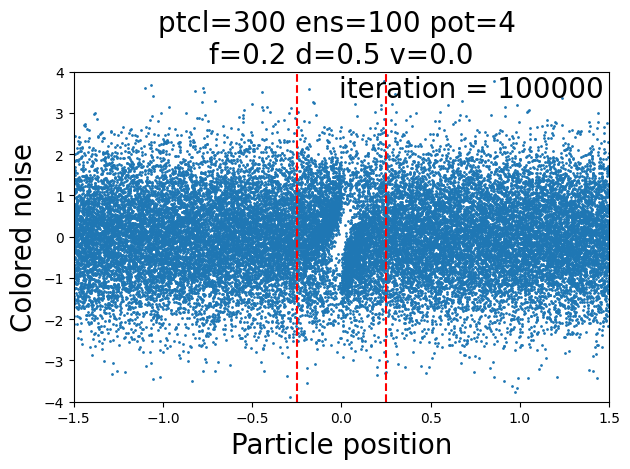

In [6]:
aoup.phase_space(frames=100)